# An Introduction to Genome Analysis in Python (Data Science Tutorial)
## Shivani Amin
### University of Maryland, College Park
### CSMC320: Introduction to Data Science, Fall 2020
### Published December 21, 2020

All around us, there is life: the earth is incredibly diverse and there exist millions and millions of species of plants and animals and bacteria, and probably millions more that are yet to be discovered. From giant Californian coast redwoods to the African elephant to the Western honey bee to microscopic marine algae, and everything in between, the foundation for all life is the genetic code.

All life is encoded in DNA (deoxyribose nucleic acid), the molecule that encodes all the information necessary to create and regulate organisms, and the hereditary information that makes each species unique. DNA is a double-stranded helix and consists of only four nucleotide bases: 

*   Adenine
*   Cytosine
*   Guanine
*   Thymine,

a long string of A's, C's, G's, and T's in each organism's genetic sequence. These four nucleotides come together intricately in the structure of DNA via chemical bonds and complementary base pairing. Adenine pairs with thymine while guanine pairs with cytosine due to their specialized chemical structures that allow them to fit together on the rungs of the DNA helical ladder. Together, this intricately structured DNA molecule provides the instructions for all living cells to be able to survive, function, and reproduce.

Living organisms, especially multicellular, eukaryotic organisms are highly complex, so you can imagine that the DNA coding sequence within organisms, although only comprised of four bases, is very, very long. The size of the genome (genome = the genetic material in an organism) ranges widely among different eukaryotic organisms. Budding yeast have 12 million base pairs in their genome; the human genome is about 3 billion base pairs long; and the largest known genome size is that of a rare Japanese flower, Paris japonica, at a mind-blowing 150 billion base pairs long! If the DNA from a single cell of this flower were stretched out, it would measure to be about 300 feet from end-to-end! And that's just in a single cell! Humans have over 30 trillion cells in their body - the sheer amount of DNA within any single living organism is truly staggering!

** Genetics is very cool! If you'd like to learn more about how DNA is organized and how it functions on a cellular level: check out this [lesson on DNA structure and function](https://www.khanacademy.org/test-prep/mcat/biomolecules/dna/a/dna-structure-and-function) (additional resources will also be linked at the end of this tutorial)!


<table><tr>
<td> <img src="https://www.ecotextile.com/images/stories/2018/October/Fabric-of-Life.JPG" width="665"/> </td>

<td> <img align="middle" src=https://www.nationalgeographic.com/content/dam/news/2018/04/25/dna-day-genographic/01-dna-day-genographic.ngsversion.1524655805906.adapt.1900.1.jpg width= "700"/> </td>
</tr></table>

<center>Sources: 1. ecotextile.com 2. nationalgeographic.com </center>



Thankfully, biotechnology has advanced a lot in the past couple decades, and today next-generation sequencing allows for large-scale determination of the gene sequence from a DNA sample. While previously sequencing a genome required a lot of time and resources (the Human Genome Project was a 13-year project, from 1990 to 2003, that took about $1,000,000,000 to sequence the entire human genome), next-generation sequencing allows for whole genome sequencing in just a day for a few thousand dollars. This means that we can analyze the whole genome sequence if we desire - of course we'd have to then look at 3 billion base pairs of genetic code, but this is a lot easier to work with using Python libraries, such as Pandas. So let's jump in and get our hands on some DNA!



---


# Data Collection

As we've learned, the human genome is roughly 3 billion base pairs long, so in order to gain insight about the whole human genome at once, we'd be looking at over 3 billion A's, C's, G's, and T's on a screen. Let's narrow down our dataset. How can we do that? Well, conveniently enough DNA is already organized into smaller tightly packaged segments in the nuclei of each cell, into what are called *chromosomes*.

The human genome is organized into 23 pairs of chromosomes, one each inherited from the mother and father. Chromosome sizes vary widely as well; chromosome 1 spans 249 million base pairs (representing 8% of the total DNA in cells), and many other chromosomes are much smaller in size.

For the purposes of our analysis, let's look at the smallest human chromosome, chromosome 21, which is about 48 million base pairs long. This is still a very large DNA sequence, but considerably smaller compared to the whole human genome size of 3 billion base pairs.

<center> <img src="https://project8p.org/wp-content/uploads/2019/04/Project-8p-Chromosome-101-01.png" width="800"/> </center>

<center> <img src="https://cdn.britannica.com/12/91212-050-21A839CD/Karyotype-human-chromosomes-images-digital-light-microscope.jpg" width="700"/> </center>

<center> Sources: 1. project8p.org 2. cdn.britannica.com </center>


You can learn more about chromosomes by checking out [this article](http://www.genesandhealth.org/genes-your-health/46-%E2%80%93-magical-number).

### Data Source: 
A common text-based format for representing DNA sequences is the FASTA format, in which the nucleotides are listed in a long raw sequence of A's, C's, G's, and T's. FASTA files, along with other file formats, for each of the human chromosomes can be found [here](ftp://ftp.ensembl.org/pub/current_fasta/homo_sapiens/dna/). The data file we're going to be working with in this tutorial is the one titled "*Homo_sapiens.GRCh38.dna.chromosome.21.fa.gz*". Breaking down this file name to reinforce understanding of what data we're working with - *Homo sapiens* is the scientific name for humans, *GRCh38* references the Genome Reference Consortium ID, and this FASTA sequence is for *DNA* on *chromosome 21*. FASTA format is really simple: it consists of a header (starting with '>' for a single-line description or sequence name), followed by lines of sequence data.

(This directory has lots of genome data publicly available, for hundreds of different species, and is updated regularly. The data file we are using is from the latest release, modified in Oct. 2020).

In [216]:
# The first thing to do is open our file with the downloaded FASTA data file.
data = open('/content/Homo_sapiens.GRCh38.dna.chromosome.21.fa', 'r')

# Read the contents of the file, and display the first 1500 bases (since we don't 
  # want to print all 48 million-something bases - that would likely result in an
  # overflow). This is just to check that the data was read in properly. 
dna_seq = data.read()
print("DATA FILE: \n" + dna_seq[:1500] + "\n")
print("DNA SEQUENCE LENGTH:" + str(len(dna_seq)) + "\n")

# Extract the FASTA header to separate it out from the genetic code.
fasta_header = dna_seq.partition('\n')[0]
print("FASTA HEADER" + fasta_header)

DATA FILE: 
>21 dna:chromosome chromosome:GRCh38:21:1:46709983:1 REF
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
NNNNNNNNNNNNNNNN

The output shows a long string of N's, but we were expecting only A's, C's, G's, and T's, the four bases that are the foundation of all genetic code. It turns out, that in large DNA fragments (in this case, an entire chromosome), the sequencer is often uncertain in identifying bases towards the start and end of the DNA fragment, and outputs 'N' as an identifier for "any one of the four basic nucleotides". This is not very helpful to us for analysis, so we'll need to do some processing to eliminate all the uncertain bases in the DNA sequence.



---


# Data Processing

First let's work with the FASTA format, to extract the header (the header confirms that this sequence is indeed the one for homo sapiens chromosome 21), so that we're left with just the raw DNA sequence.

In [217]:
# Remove the FASTA header from the sequence data.
print("HEADER LENGTH = " + str(len(fasta_header)) + "\n")
dna_seq = dna_seq[56:]

seq_len = len(dna_seq) # DNA sequence length
print("FASTA DATA SEQUENCE LENGTH = " + str(seq_len) + "\n")

HEADER LENGTH = 56

FASTA DATA SEQUENCE LENGTH = 47488484



We saw that all the bases that were output in the FASTA data file were 'N', which might seem fishy or appear that we don't have good data. However, we only looked at 1500 bases, out of over 47,000,000 bases in this data file, so it's expected that a large number of the bases towards the beginning of the sequenced DNA will be uncertain. Taking a look at the original data file downloaded from the directory, we can see that there are millions and millions of coded sequences of 'A', 'C', 'G', and 'T' in the file, with 'N' appearing only minimally towards the start and the end of the sequence. To be sure, we can perform a count of how many base positions were lost after we remove the 'N's from the sequence. 

It's important to note that we should only remove N's from the beginning and end of the sequence. If we remove any 'N' from the middle of the sequence, this would result in a *frameshift mutation*. Frameshift mutations occur when a singular base is inserted or deleted from the DNA sequence, causing all other bases to shift by one. Since the genetic code dictates the function and activity of certain cellular activities in an organism, a frameshift mutation may lead to certain processes no longer being functional. By inspecting the data file, it appears that the N's only occur in the beginning and the end, but to be sure, we'll check that we aren't removing any N's from the middle of the sequence.

In [218]:
# Find positions in the middle of the sequence which contain 'N'.
for pos in range (1, len(dna_seq) - 1):
  if dna_seq[pos] == 'N':
    if dna_seq[pos - 1] != 'N' and dna_seq[pos + 1] != 'N':
      print(pos)

6740684
8184003
8354160
42526857
42527409
42527683


We found 6 instances in which there was an 'N' in the middle of the DNA sequence (at varying positions, as can be seen in the output cell above). Upon closer inspection of the FASTA data file (by carefully scrolling through the millions of bases in the sequence), it appears that there are multiple instances in which long strings of N's appear in between coding regions of 'A', 'C', 'G', and 'T'. This is a result of error in the sequencer and there's not much we can do about the missing data since we don't have raw chromatograph files to analyze the DNA sequence interpretation by eye. Chromatographs show the sequencing results for each position in the DNA, i.e. the sequencer's interpretation of what the base at each position is (this is determined based on chemical signals exuded by each base while sequencing). Chromatographs allow us to check by eye what the base most likely should be, and correct for any unidentified (N) bases in the sequence. 

Even if we did have a chromatograph for all the bases in chromosome 21, it would take us a painstakingly long time to look at each base one by one. The best option would be to find better data that has fewer unidentified bases, but generally sequencers will not be able provide DNA sequences with 100% certainty. To move forward, we'll have to make the best of what data we have in doing our sequence analysis.

You can read more about sequencing and chromatographs at [this webpage](https://biology.unt.edu/~jajohnson/Chromatogram_Interpretation).

One option in dealing with the N's in the sequence (without causing frameshift mutations) is to find the first chunk of N's in the beginning of the DNA sequence, and the last chunk of N's at the end of the sequence, and remove these. Removing the front and end of the sequence will not result in frameshift mutations. Of course, this means we still will have large regions of N in the middle of the sequence, but doesn't seem to be any clear way to resolve this issue, so we'll keep these N's and deal with them as we go forward in our analysis.

In [219]:
# Function that finds the start of the well-identified coding region (A, C, G, 
  # and T instead of N)
def find_start_coding_region(seq):
  for pos in range(1, len(seq) - 1):
    # We need to check if the position two bases out from the current position
      # is also not 'N' because there could be a newline character in the following
      # position.
    if seq[pos] == 'N' and seq[pos + 1] != 'N' and seq[pos + 2] != 'N':
      return pos + 1

# Function that find the position of the last chunk of unidentified region in 
  # the sequence (long string of N's)
def find_end_coding_region(seq):
  last_N_chunk = 0
  for pos in range(1, len(seq) - 1):
    # Similarly, we need to check whether two positions before the current position
      # is not an 'N'.
    if seq[pos] == 'N' and seq[pos - 1] != 'N' and seq[pos - 2] != 'N':
      last_N_chunk = pos
  return last_N_chunk - 1 # Return the last occurence (at the very end of the sequence)

# Store these start and end positions (the sequence in between we'll call our 
  # "coding region")
start_coding_region = find_start_coding_region(dna_seq)
print("Start coding region: " + str(start_coding_region))

end_coding_region = find_end_coding_region(dna_seq)
print("End coding region: " + str(end_coding_region))

print("Length of N's at end :" + str(seq_len - end_coding_region))

print("Sequence length remaning: " + str(seq_len - start_coding_region - (seq_len - end_coding_region)))

Start coding region: 5093500
End coding region: 47478316
Length of N's at end :10168
Sequence length remaning: 42384816


We discovered that there are 5,093,500 unidentified bases at the beginning of the sequence and 10,168 bases at the end. That's a lot of bases to remove, but we still have 42,385,816 bases remaining in the sequence.

Now, we'll clean up the DNA sequence further by removing all the newline characters. For further analysis, we need the sequence to be one long string without any whitespace in between nucleotides [nucleotides are synonymous with bases].

In [220]:
# Since the sequence contains over 47 million base pairs, trying to parse all
  # the data at once requires too much processing power and results in a runtime 
  # disconnect error. To work around this issue, we'll parse the sequence in 
  # chunks of four, of size 10 million base pairs in each iteration.

# Start and end position for sequence parse in first iteration of loop
start_pos = start_coding_region
end_pos = 10000000

# We'll build up a new sequence of the modified DNA, with all '\n removed.
mod_dna_seq = ""

# Modify DNA sequence to remove all \n' chars
print("Modifying DNA Sequence")
while end_pos < end_coding_region:
  dna_chunk = dna_seq[start_pos: end_pos].replace('\n', '') # Remove each instance of '\n'
  mod_dna_seq += dna_chunk # Build up modified DNA sequence
  # Print the start and end positions in each iteration to make sure we're parsing
    # all segments of the sequence
  print("start: " + str(start_pos) + " end: " + str(end_pos) + " dna length: " +
        str(len(mod_dna_seq)))
  start_pos = end_pos + 1 # Update start position
  end_pos += 10000000 # Increment end position by 10,000,000

# We still need to modify the last chunk of the FASTA file, up to the end of the
  # sequence, and then we'll have our final modified DNA sequence.
last_dna_chunk = dna_seq[start_pos: end_coding_region].replace('\n', '') # Remove each instance of '\n'
mod_dna_seq += last_dna_chunk # Build up modified DNA sequence
print("start: " + str(start_pos) + " end: " + str(seq_len) + " dna length: " + 
      str(len(mod_dna_seq)))

dna_length = len(mod_dna_seq) # Modified DNA sequence length
print("\nDNA SEQUENCE MODIFIED LENGTH: " + str(dna_length) + "\n")

# Difference in sequence length between original FASTA data and modified sequence
print("ELIMINATED SEQUENCE: " + str(seq_len - dna_length) + "\n")

Modifying DNA Sequence
start: 5093500 end: 10000000 dna length: 4826065
start: 10000001 end: 20000000 dna length: 14662130
start: 20000001 end: 30000000 dna length: 24498194
start: 30000001 end: 40000000 dna length: 34334259
start: 40000001 end: 47488484 dna length: 41689978

DNA SEQUENCE MODIFIED LENGTH: 41689978

ELIMINATED SEQUENCE: 5798506



After removing all the newline characters and joining the sequence together into one large string, we have 41,689,978 bases in the total sequence. Let's see what the modified DNA sequence looks like now (first 1500 bases only, of course).

In [221]:
mod_dna_seq[:1500]

'GATCCACCCGCCTTGGCCTCCTAAAGTGCTGGGATTACAGGTGTTAGCCACCACGTCCAGCTGTTAATTTTTATTTAATAAGAATGACAGAGTGAGGGCCATCACTGTTAATGAAGCCAGTGTTGCTCACAGCCTCCCCTTGGTCACTTTTTGTGACTGAAGGGCATGTGTTCAGGCAAGATTGTTGGGTGGCTGTGTTTTGTCTTCTTCCAGCTCGGCCATGGAATAGCCTGTGGGGACCTACTCTGTGGTCCCCAGGGAGCTACTCTGTGGGGGCTGTTTCTGTTCAGCAGGGAAGGCTCTGCCCTTGCTGTTAGCTCCTGGAGGGCTGCGGACGGCACCTGCTGTGTTCACAGATGACAGTTACTTCCCTAGGTAGTCTGCATGTTGGGCCTCCCAGGACTGGTTCTCTAAGGGCAATGTGAGGACAGACAGAAAAACCAAATTCTGCCAAAGTTTTTAAATAGGTTTATTCTGAGCCAATAAGAGTGACCATGGCCTGGGAAATACAGTCTTAAGAGATCCCGAGGAAGTGCACCTGAGGCGGTCAGTTACAATTTGGTTTTATGTATTTATTTATTTTTATTTTATTTATTTATTTATTTGTTTTTGAGACGGAGGCTTGCTCTGTCGCCCAGGCTGGAGTGCAGTGGCGTGATCTCGGCTCACCGCAAGCTCCGCCTCCCGCGTTCCTGCCATTCTCCTGCCTCAGCCTCCCGAGTAGCTGGGACTACAGGCGCCCGCCACCATGCCTGGCTAATTTTTTTATATTTTTAGTAGAGACGGGGTTTCACCGTGTTAGCCAGGATGGTCTCAATCTCCTGACCTCGTGATCCGCCCGCCTCTGCCTCCCAAAGTGCTGGGATTACAGGCGTGAGCCACCACTCCCAGCACAATTGGTTTTGTACATTTCAGGGAGATGCGAACTGCAGGTGGAATCAGAAAACAGTACACGGGCCGGGCGCGGTGGCTCACGCCTGTAATCCCAGCACTTTGAGC

Back to a quick genetics lesson.

The flow of genetic information is inscribed in the **central dogma** of biology, the process in which the building blocks of DNA that encode instructions within a cell (the base pairs) are converted into functional products in the form of proteins in the body.

DNA is stored in the nucleus of the cell, and proteins are produced in a different part of the cell, the ribosome, which is far away from the nucleus. In order to transport the genetic information in DNA to the ribosomes, an intermediary carrier is needed - that's where messenger RNA (mRNA) comes in. **Transcription** is the first stage in central dogma, and is the process by which information in the DNA in the nucleus is converted into small, portable mRNA messages that travel to ribosomes. In the second stage, **translation**, the mRNA messages are read to make specific proteins that function to keep the organism alive.

To summarize, central dogma explains the flow of genetic information from DNA to RNA to proteins.

Learn more about the central dogma of moelcular biology through this [lesson on intro to gene expression ](https://www.khanacademy.org/science/high-school-biology/hs-molecular-genetics/hs-rna-and-protein-synthesis/a/intro-to-gene-expression-central-dogma).



<center> <img src="https://cdn.kastatic.org/ka-perseus-images/2b597889d05bc601803a3b4d9ec5ccd5e7b8d3af.png"/> </center>

<center> Source: cdn.kastatic.org </center>

### Step 1: Transcription

RNA (ribonucleic acid) has a slightly different genetic code than DNA: it's nucleotide bases are Adenine, Cytosine, Guanine, and Uracil (instead of Thymine) - A, C, G, and U. The base pairing remains the same: G pairs with C, and in place of T, U pairs with A. RNA is a single-stranded molecule, unlike the DNA double helix.

<center> <img src="https://cdn.kastatic.org/ka-perseus-images/55e45fb61bd718907a9feee5987d04c0c2b055c3.png"/> </center>

<center> Source: cdn.kastatic.org </center>

Just for fun, let's see how many of each nucleotide is in our DNA sequence.


In [222]:
print("A: " + str(mod_dna_seq.count('A')))
print("C: " + str(mod_dna_seq.count('C')))
print("G: " + str(mod_dna_seq.count('G')))
print("T: " + str(mod_dna_seq.count('T')))

A: 11820662
C: 8185243
G: 8226379
T: 11856330


There is a similar count of A's and T's (about 11,000,000 each) and C's and G's (about 8,000,000 each). This makes sense considering the base pairing rules in DNA.

Now, let's implement transcription on our DNA. This is easy - we just replace all instances of T in the DNA by U. Since the RNA will be transcribed complementary to the template strand, we get back the same orientation as the original DNA coding strand (5' to 3', which indicates the two ends of the genetic molecule).

In [223]:
# TRANSCRIPTION (DNA to mRNA)
mrna_seq = mod_dna_seq.replace('T', 'U')
mrna_length = len(mrna_seq)

print("mRNA LENGTH = " + str(mrna_length) + "\n")
print("SEQUENCES TRANSCRIBED CORRECTLY: " + str(dna_length == mrna_length) + "\n")

mrna_seq[:1500]

mRNA LENGTH = 41689978

SEQUENCES TRANSCRIBED CORRECTLY: True



'GAUCCACCCGCCUUGGCCUCCUAAAGUGCUGGGAUUACAGGUGUUAGCCACCACGUCCAGCUGUUAAUUUUUAUUUAAUAAGAAUGACAGAGUGAGGGCCAUCACUGUUAAUGAAGCCAGUGUUGCUCACAGCCUCCCCUUGGUCACUUUUUGUGACUGAAGGGCAUGUGUUCAGGCAAGAUUGUUGGGUGGCUGUGUUUUGUCUUCUUCCAGCUCGGCCAUGGAAUAGCCUGUGGGGACCUACUCUGUGGUCCCCAGGGAGCUACUCUGUGGGGGCUGUUUCUGUUCAGCAGGGAAGGCUCUGCCCUUGCUGUUAGCUCCUGGAGGGCUGCGGACGGCACCUGCUGUGUUCACAGAUGACAGUUACUUCCCUAGGUAGUCUGCAUGUUGGGCCUCCCAGGACUGGUUCUCUAAGGGCAAUGUGAGGACAGACAGAAAAACCAAAUUCUGCCAAAGUUUUUAAAUAGGUUUAUUCUGAGCCAAUAAGAGUGACCAUGGCCUGGGAAAUACAGUCUUAAGAGAUCCCGAGGAAGUGCACCUGAGGCGGUCAGUUACAAUUUGGUUUUAUGUAUUUAUUUAUUUUUAUUUUAUUUAUUUAUUUAUUUGUUUUUGAGACGGAGGCUUGCUCUGUCGCCCAGGCUGGAGUGCAGUGGCGUGAUCUCGGCUCACCGCAAGCUCCGCCUCCCGCGUUCCUGCCAUUCUCCUGCCUCAGCCUCCCGAGUAGCUGGGACUACAGGCGCCCGCCACCAUGCCUGGCUAAUUUUUUUAUAUUUUUAGUAGAGACGGGGUUUCACCGUGUUAGCCAGGAUGGUCUCAAUCUCCUGACCUCGUGAUCCGCCCGCCUCUGCCUCCCAAAGUGCUGGGAUUACAGGCGUGAGCCACCACUCCCAGCACAAUUGGUUUUGUACAUUUCAGGGAGAUGCGAACUGCAGGUGGAAUCAGAAAACAGUACACGGGCCGGGCGCGGUGGCUCACGCCUGUAAUCCCAGCACUUUGAGC

### Step 2: Translation

Translation, the process in which mRNA directs protein synthesis, is a more involved process (in terms of coding up the implementation).

<center> <img src="https://cdn.kastatic.org/ka-perseus-images/6f03ca3333ad7d5f7c68c0c8bbecfcab04b16ce0.png"/> </center>

<center> Source: cdn.kastatic.org </center>

Proteins are made up of amino acids; there are twenty different amino acids, shown in the amino acid chart below. The genetic code dictates that the nucleotides of mRNA are read in triplets, called **codons**. There are 61 possible codons with the four mRNA nucleotides. You might be wondering, how then, there are only twenty amino acids. Multiple codons can encode the same amino acid. One of the codons (AUG) is the start codon, where translation of the mRNA begins to create a specific protein. Three codons are stop codons (UGA, UAG, and UAA), where translation of a specific protein terminates. In this way, large segments of DNA on chromosomes (**genes**) encode the information required to synthesize tens of thousands of specialized proteins in the body. There are estimated to be between 200 and 300 genes on chromosome 21, but one gene can encode lots of proteins.


<center> <img src="https://i0.wp.com/www.compoundchem.com/wp-content/uploads/2014/09/20-Common-Amino-Acids-v3.png?w=1160&ssl=1" width="900"/> </center>

<center> Source: compoundchem.com </center>

In [224]:
# Let's begin by finding the first occurence of the start codon in the DNA.
start_codon = mrna_seq.find('AUG')
print("Start codon: " + str(start_codon))

Start codon: 83


Now let's figure out a way to translate all of the codons in the mRNA sequence into a sequence of proteins (indicated by twenty different letters, each corresponding to a particular amino acid). There's a handy amino acid chart that we can use that graphically shows what codons encode each amino acid.
<br></br>

<center> <img src="https://trufoodsnutrition.com/wp-content/uploads/2019/02/amino-acid-chart.png" width="700"/> </center>

<center> Source: trufoodsnutrition.com </center>


Remember those pesky N's in the sequence? To deal with those, let's just disregard any codon that contains an N since there's no way to know which amino acid it might encode. We'll denote amino acids containing an 'N' with 'X' the protein sequence; all other amino acids will be denoted by their single-letter identifier ('A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M' (start codon), 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', and '*' for stop codons).

In [225]:
# We'll create a dictionary to encode the codons corresponding to each of the 20
  # amino acids, the start codon, the stop codons, and deal with N's in the sequence
  # as well.
codons = {"GCG" : "A", "GCA" : "A", "GCC" : "A", "GCU" : "A", # Alanine
            "UGC" : "C", "UGU" : "C", # Cysteine
            "GAC" : "D", "GAU" : "D", # Aspartic acid
            "GAG" : "E", "GAA" : "E", # Glutamic acid
            "UUC" : "F", "UUU" : "F", #Phenylalanine
            "GGG" : "G", "GGA" : "G", "GGC" : "G", "GGU" : "G", # Glycine
            "CAU": "H", "CAC" : "H", # Histidine
            "AUU" : "I", "AUC" : " I", "AUA" : "I", # Isoleucine
            "AAA" : "K", "AAG" : "K", # Lysine
            "CUU" : "L", "CUC" : "L", "CUA" : "L", "CUG" : "L", "UUG" : "L", "UUA" : "L", # Leucine
            "AUG" : "M", # Methionine (start codon)
            "AAC" : "N", "AAU" : "N", # Asparagine
            "CCU" : "P", "CCC" : "P", "CCA" : "P", "CCG" : "P", # Proline
            "CAA" : "Q", "CAG" : "Q", # Glutamine
            "CGU" : "R", "CGC" : "R", "CGA" : "R", "CGG" : "R", "AGA" : "R", "AGG" : "R", # Arginine
            "UCG" : "S", "UCA" : "S", "UCC" : "S", "UCU" : "S", "AGU" : "S", "AGC" : "S", # Serine
            "ACU" : "T", "ACC" : "T", "ACA" : "T", "ACG" : "T", # Threonine
            "GUG" : "V", "GUA" : "V", "GUC" : "V", "GUU" : "V", # Valine
            "UGG" : "W", # Tryptophan
            "UAC" : "Y", "UAU" : "Y", # Tyrosine
            "UGA" : "*", "UAG" : "*", "UAA" : "*", # Stop codons
          
            # Since we can't remove N's from the middle of the sequence (would result
              # in frameshift mutations), we'll enocde any codon in the mRNA that
              # has an N as "X" in the protein sequence. Here are all the possible
              # configurations in which N can be present in a codon:
            "NNN" : "X", 
            "NNA" : "X", "NNC" : "X", "NNG" : "X", "NNU" : "X",
            "ANN" : "X", "CNN" : "X", "GNN" : "X", "UNN" : "X",
            "NAA" : "X", "NAC" : "X", "NAG" : "X", "NAU" : "X",
            "NCA" : "X", "NCC" : "X", "NCG" : "X", "NCU" : "X",
            "NGA" : "X", "NGC" : "X", "NGG" : "X", "NAU" : "X",
            "NUA" : "X", "NUC" : "X", "NUG" : "X", "NUU" : "X",
            "ANA" : "X", "ANC" : "X", "ANG" : "X", "ANU" : "X",
            "CNA" : "X", "CNC" : "X", "CNG" : "X", "CNU" : "X",
            "GNA" : "X", "GNC" : "X", "GNG" : "X", "GNU" : "X",
            "UNA" : "X", "UNC" : "X", "UNG" : "X", "UNU" : "X",
            "AAN" : "X", "ACN" : "X", "AGN" : "X", "AUN" : "X",
            "CAN" : "X", "CCN" : "X", "CGN" : "X", "CUN" : "X",
            "GAN" : "X", "GCN" : "X", "GGN" : "X", "GUN" : "X",
            "UAN" : "X", "UCN" : "X", "UGN" : "X", "UUN" : "X",
            }

In [226]:
# TRANSLATION (mRNA to protein)
# This function synthesizes a specific protein sequence, starting from the start
  # codon in the mRNA sequence and terminating translation once a stop codon is reached.
def translate(start):
  protein_seq = "" # We'll build up the protein sequence
  translate_pos = start
  while mrna_seq[translate_pos: translate_pos+3] not in stop_codons: # Tranverse mRNA sequence by triplets
    amino_acid = codons[mrna_seq[translate_pos: translate_pos+3]] # Identify each amino acid based on codon dict
    protein_seq += amino_acid # Add the amino acid to the protein sequence
    translate_pos += 3
  protein_seq += amino_acid # Add stop codon to sequence
  proteins.append(protein_seq) # Add synthesized protein to proteins list
  return translate_pos # Return position of stop codon

In [227]:
# Now we'll call the translate function on our sequence
proteins = [] # Create a list to store all synthesized proteins
start_codon_seq = 'AUG' # Start codon
stop_codons = ['UGA', 'UAG', 'UAA'] # Stop codons

# Begin translation at the first start codon
translate_pos = translate(start_codon)

# Iterate through mRNA sequence, calling translate() each time start codon is found
while translate_pos < end_coding_region:
  if mrna_seq[translate_pos: translate_pos + 3] == start_codon_seq:
    translate_pos = translate(translate_pos)
  else:
    translate_pos += 3

print("Ended Translating at: " + str(translate_pos) + "\n")
print("PROTEINS: ")
proteins[:25] # Display first 25 proteins in list

Ended Translating at: 47478317

PROTEINS: 


['MTEE',
 'MKPVLLTASPWSLFVTEGHVFRQDCWVAVFCLLPARPWNSLWGPTLWSPGSYSVGAVSVQQGRLCPCCC',
 'MTVTSLGSLHVGPPRTGSLRAMM',
 'MAWEIQSS',
 'MYLFIFILFIYLFVFETEACSVAQAGVQWRDLGSPQAPPPAFLPFSCLSLPSSWDYRRPPPCLANFFIFLVETGFHRVSQDGLNLLTSS',
 'MHGTESSPQTRSFLLWAPGRQPLRLVVAVDGSALVGSTPQLALACGPCELSRVCPGV ISCCRTRPCPLLLPLSAHSPLSCRWRSGDPS ILCTAPHLPWATPVTVLPVSDASVLAACPHHPCLLSSLLTPPCQGRNCKLSAFFKNSF IEAPLTYSKLHAFSVSDWMSSELAPHPCTPHQSKRATEE',
 'MHLCGPSTGQGFIAAGGTGAGGSLRPRPVRPLDPLSPSLKPQFPP',
 'MHLNSVPMTSPPGPPSALPPHPTPGWYLFQFHRLLQYARPKPGSPRPFFWMFVDNLVLNKEDLDVASRFLEVRAGLRGPPSDPCPREGGAFLVELSLHPRLRAWLLAAPGFQVCTGPRRAAVQSGQGLRPGTQSPFKDSMGGQSHLAPLLCSQNTASGAHLLPLPPQSPPTHTH ITPHTQVHTHCSAQSLYTCTTHRDTLATHTQAHYVHTYSHHTHTAFSSHVV',
 'MQ IQLFRRGANAMSS',
 'MSVCRNEALNLRGLLRTQALKRTTSVNRPEPVCGRGPLSGGGSS',
 'MEPVT IPDVHGGSLQNAVRVWSN IPAIRRYFLGSS',
 'MRAHTQPHSHDSLARSSIRLCAHVCTHTQSFPRSRSSTHLCAHACTHSHPHSHAHPHTHMLPQSHAHTSTLTTTTC IHTFTCAHNHTGTHASVSPTHTLAPPAVHSWAALPTFWGLEHMAFPHVPSLRLSTPFCCPHSLSQLPPPLNSLSRRPRPHDLQPTAHPSPHSHTRLACLAHTCIRVERALSGSAESS

In [228]:
print("Number of Proteins Synthesized: " + str(len(proteins)))

Number of Proteins Synthesized: 175985


There were a total of 175,986 proteins synthesized from the mRNA sequence. This number seems quite high, especially given that chromosome 21 is a relatively small chromosome. There are many complexities with DNA sequencing and the flow of genetic information through central dogma that are missed with this simplistic approach. There are other initiation factors and proteins that are involved in protein synthesis, so that not all the protein sequences we found may actually be translated from this chromosome in actual cells. Additionally, not all regions of the mRNA correspond to particular amino acids. An area near the 5' end known as the untranslated region (UTR) which has a ribosome binding site required for the process of protein synthesis, but doesn't affect the sequence of amino acids.

Nevertheless, let's work with what we have and explore the data a little more.



---


# Exploratory Data Analysis & Data Visualization

From the small sample of protein sequences we've looked at, we can already see that there is a range in protein size (from some very small proteins, only several amino acids long to some much larger proteins). Again, the smaller protein sizes are probably due to errors in our method of dealing with unidentified bases in the sequence and in the process of translation. It would be unusual to see so many proteins of small sizes. Let's visualize the distribution of protein sizes on a histogram.

In [229]:
import pandas as pd

# Let's start by creating a dataframe in which to store the protein seqeunces we've extracted
ch21code_df = pd.DataFrame(data=proteins, columns=['amino acid sequence']) # Store the amino acid sequences of each protein
ch21code_df['protein length'] = ch21code_df.apply(lambda row: len(row['amino acid sequence']), axis=1) # Store the amino acid lengths
ch21code_df['nucleotides'] = ch21code_df['protein length'] * 3 # Store the nucleotide lengths
print("Number of Proteins i DataFrame: " + str(len(ch21code_df)))
ch21code_df

Number of Proteins i DataFrame: 175985


,amino acid sequence,protein length,nucleotides
0,MTEE,4,12
1,MKPVLLTASPWSLFVTEGHVFRQDCWVAVFCLLPARPWNSLWGPTL...,69,207
2,MTVTSLGSLHVGPPRTGSLRAMM,23,69
3,MAWEIQSS,8,24
4,MYLFIFILFIYLFVFETEACSVAQAGVQWRDLGSPQAPPPAFLPFS...,89,267
...,...,...,...
175980,MAGRRLVPEWIRIDHHTCTS INSEEVPQGG,31,93
175981,MHYQPTPPYFCTISSLLCISFQQ,23,69
175982,MGINNWRSDFKWCRRWPVGDGSRHTGSKRALRSPHVPACGVQPRQC...,76,228
175983,MAEHRGQAGPVVPGCKQGAPKTGFSDYSGSTRLCAAGDVCLCACTA...,381,1143


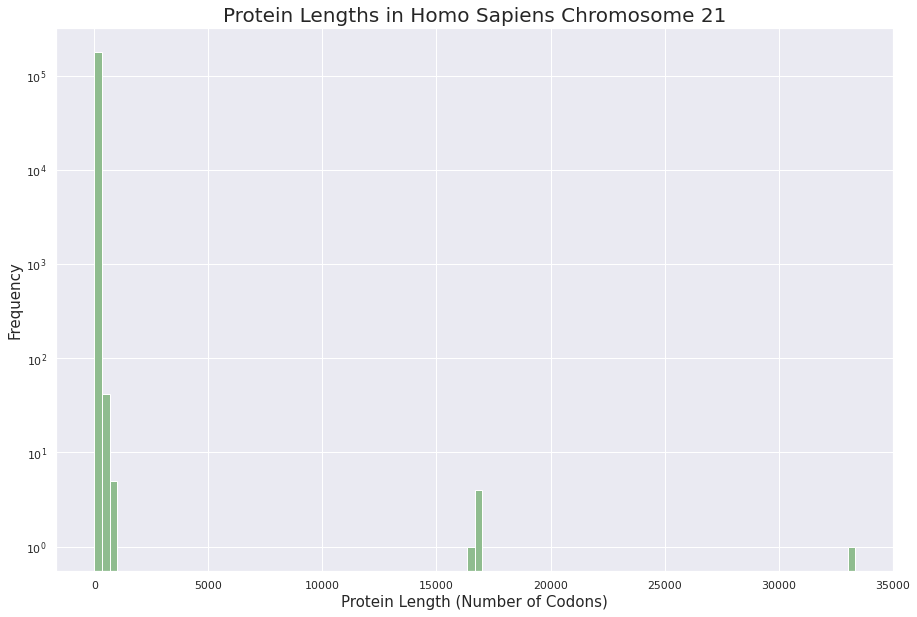

In [230]:
# Now that we have our dataframe, let's create a histogram to visualize the
  # distribution of protein lengths we found on chromosome 21
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Create histogram
plt.figure(figsize=(15, 10)) # Adjust scatterplot size
ch21code_df['protein length'].plot(kind='hist', bins=100, logy=True, 
                                   color= 'darkseagreen') # Input data
plt.title("Protein Lengths in Homo Sapiens Chromosome 21", fontsize = 20) # Title
plt.xlabel("Protein Length (Number of Codons)", fontsize = 15) # x-axis
plt.ylabel("Frequency", fontsize = 15) # y-axis
sns.set_style('darkgrid')
plt.show()

The distribution of protein sizes seems to have some outliers: most of the proteins are on the smaller side with fewer than a thousand codons, a few proteins are medium-sized around 15,000 to 20,000 codons, and one protein is very large, around 33,000 codons.

To better visualize the data (and especially see the distribution of the smaller proteins better), we can split up the data into small, medium, and large protein sizes in order to get a clearer picture. This will mostly be helpful for the smaller proteins, but we can still get more precise estimate of the sizes of the larger proteins.

In [231]:
# We can split up the data based on protein sizes: small proteins with fewer 
  #than 10,000 codons, medium-sized proteins between 10,000 and 25,000 codons 
  # long, and large proteins with more than 25,000 codons

# Small Proteins
small_proteins_df = ch21code_df.loc[ch21code_df['protein length'] < 10000]
print("Number of Small Proteins: " + str(len(small_proteins_df)))
small_proteins_df

Number of Small Proteins: 175979


,amino acid sequence,protein length,nucleotides
0,MTEE,4,12
1,MKPVLLTASPWSLFVTEGHVFRQDCWVAVFCLLPARPWNSLWGPTL...,69,207
2,MTVTSLGSLHVGPPRTGSLRAMM,23,69
3,MAWEIQSS,8,24
4,MYLFIFILFIYLFVFETEACSVAQAGVQWRDLGSPQAPPPAFLPFS...,89,267
...,...,...,...
175980,MAGRRLVPEWIRIDHHTCTS INSEEVPQGG,31,93
175981,MHYQPTPPYFCTISSLLCISFQQ,23,69
175982,MGINNWRSDFKWCRRWPVGDGSRHTGSKRALRSPHVPACGVQPRQC...,76,228
175983,MAEHRGQAGPVVPGCKQGAPKTGFSDYSGSTRLCAAGDVCLCACTA...,381,1143


In [232]:
# Medium Proteins
medium_proteins_df = ch21code_df.loc[ch21code_df['protein length'] >= 10000]
medium_proteins_df = medium_proteins_df.loc[medium_proteins_df['protein length'] <= 25000]
print("Number of Medium Proteins: " + str(len(medium_proteins_df)))
medium_proteins_df

Number of Medium Proteins: 5


,amino acid sequence,protein length,nucleotides
4547,M IXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,16721,50163
5724,MYVYDLCRXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,16680,50040
6482,MVS IXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,16687,50061
8289,MQK IXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,16743,50229
11358,MPRTVNVLYTIKSRVLSILGXXXXXXXXXXXXXXXXXXXXXXXXXX...,16692,50076


In [233]:
large_protein = ch21code_df.loc[ch21code_df['protein length'] > 25000]
large_protein

,amino acid sequence,protein length,nucleotides
16362,MAYNQVKYLNTPLFK IXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...,33362,100086


We can already see from the medium proteins and large protein dataframes that a lot of 'X' denotations were included (the unidentified nucleotides in the sequence), which most likely explains why these proteins are so long in sequence. We can make sure that this is the case, and then disregard these proteins as outliers / unusable data.

In [234]:
# Examine sequences of medium-sized proteins for abundance of 'X (unidentified sequence)
for protein in medium_proteins_df['amino acid sequence']:
  print(protein[:100] + "\n")

M IXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

MYVYDLCRXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

MVS IXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

MQK IXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

MPRTVNVLYTIKSRVLSILGXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX



In [235]:
# Examine large protein for abundance of 'X' (unidentified sequence)
large_protein.at[16362, 'amino acid sequence'][:1000]

'MAYNQVKYLNTPLFK IXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

We can see that the protein sequences for medium-size and large proteins for the most part consist of 'X', so we'll ignore these protein sequences, and create another histogram to better visualize the smaller proteins.


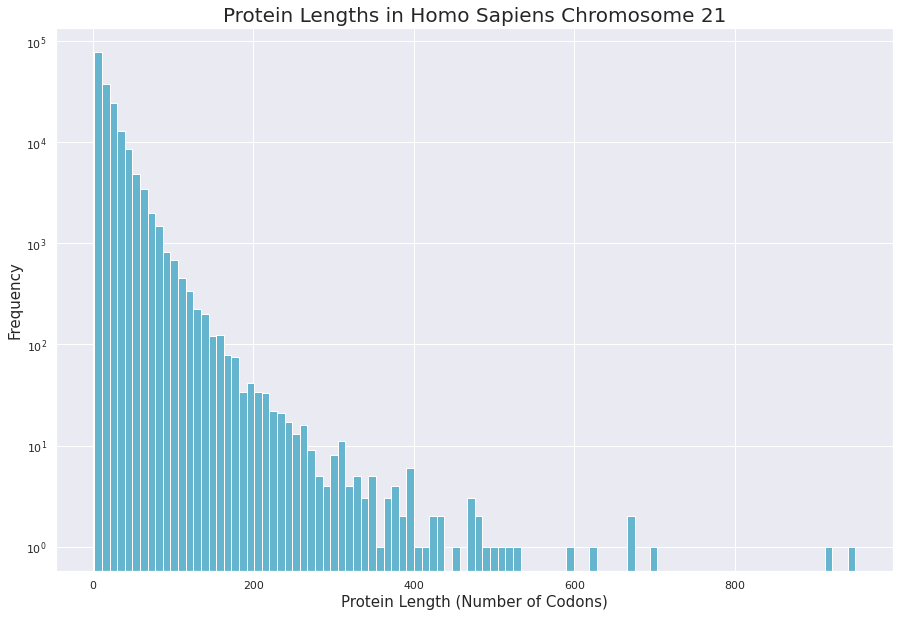

In [236]:
# Histogram, excluding the large proteins with unidentified sequence data

# Create histogram
plt.figure(figsize=(15, 10)) # Adjust scatterplot size
small_proteins_df['protein length'].plot(kind='hist', bins=100, logy=True, 
                                   color= 'c') # Input data
plt.title("Protein Lengths in Homo Sapiens Chromosome 21", fontsize = 20) # Title
plt.xlabel("Protein Length (Number of Codons)", fontsize = 15) # x-axis
plt.ylabel("Frequency", fontsize = 15) # y-axis
sns.set_style('darkgrid')
plt.show()

This distribution looks a lot better. While there are still thousands of proteins that we synthesized from the DNA and mRNA sequences (and chromosome 21 has been found to only have between 200 and 300 genes), it is highly unlikely that there would be such a huge number of proteins encoded on the smallest chromosome in the human genome.



---


# Insights & Wrap Up

Like mentioned previously, the encoding of genetic information, gene expression, and protein synthesis along the central dogma of molecular biology is very complex, and we'd need to go into a much deeper biology-focused and detailed approach in order to gain a higher level of understanding of the genetic information encoded in the DNA sequences.

Luckily, there is a large amount of openly available genetic sequence information in various genome databases. Besides from the FASTA format of raw genetic sequence, lots of other sequencing formats provide various kinds of information, from numbers of genes already detailed in the data files, for example, to additional information on proteins, and much more. There's a vast pool of genetic information that can be explored and analyzed, and hopefully this tutorial was a nice first stepping stone into your exploration of genomics and has peaked your curiosity to explore further. Happy learning!

<center> <img src="https://www.careergirls.org/wp-content/uploads/2018/03/Genetiscs1440x1000.jpg" /> </center>

---

Learning Resources: 

Linked in tutorial:

1.   DNA Structure and Function: https://www.khanacademy.org/test-prep/mcat/biomolecules/dna/a/dna-structure-and-function
2.   Chromosomes (46 - a magical number!): http://www.genesandhealth.org/genes-your-health/46-%E2%80%93-magical-number
3.   Interpretation of Sequencing Chromatograms: https://biology.unt.edu/~jajohnson/Chromatogram_Interpretation
4.   Intro to Gene Expression (Central Dogma): https://www.khanacademy.org/science/high-school-biology/hs-molecular-genetics/hs-rna-and-protein-synthesis/a/intro-to-gene-expression-central-dogma

Additional resources:

5.   Learn Genetics (Genetic Science Learning Center): https://learn.genetics.utah.edu/
2.   A Comprehensive Introduction to Your Genome with the SciPy Stack: https://www.toptal.com/python/comprehensive-introduction-your-genome-scipy








